## Image classification baseline CNN

* full data
* color


In [15]:
import numpy as np
import os
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.losses import BinaryCrossentropy
import sklearn
import matplotlib.pyplot as plt
import sklearn.metrics as skm


In [4]:
img_height=224
img_width=224
batch_size=32

In [53]:
#load test data

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'E:\Babette\MasterThesis\GoldStandard_tvt\test',
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )


Found 2622 files belonging to 2 classes.


['0_layout', '1_Genuine']


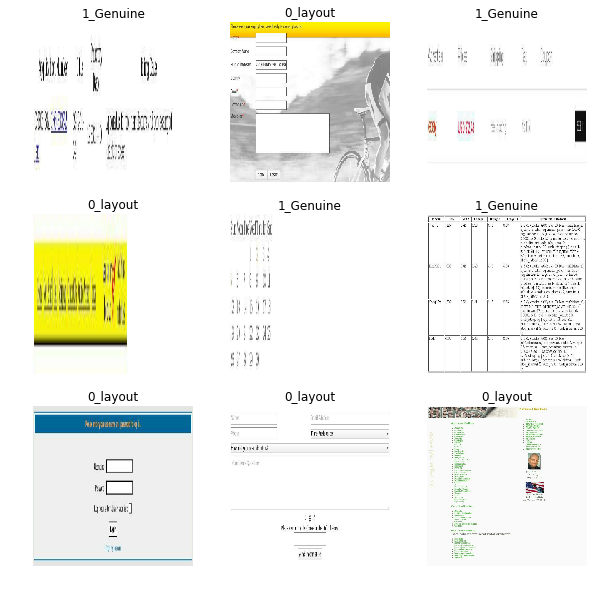

In [8]:
import matplotlib.pyplot as plt

class_names = test_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [16]:
def base_model():
    model = Sequential()
    
    #rescale
    model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

    #1st conv block
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    #2nd conv block
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    #3rd 
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    #dropout Layer
    model.add(Dropout(rate=0.2))
    
    # dense layers
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) 

    # output layer
    model.add(Dense(1, activation='sigmoid'))
    
    #print(model.summary())
    return model

In [17]:
#Initiate Model

model= base_model()
model.load_weights(r'E:\Babette\MasterThesis\Models\best_baseline_model\full_data\mini_model1_color.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 128)      

In [21]:
val_acc = np.load(r'E:\Babette\MasterThesis\Models\best_baseline_model\full_data\val_acc_history.npy')
acc = np.load(r'E:\Babette\MasterThesis\Models\best_baseline_model\full_data\acc_history.npy')
val_loss = np.load(r'E:\Babette\MasterThesis\Models\best_baseline_model\full_data\val_loss_history.npy')
loss = np.load(r'E:\Babette\MasterThesis\Models\best_baseline_model\full_data\loss_history.npy')

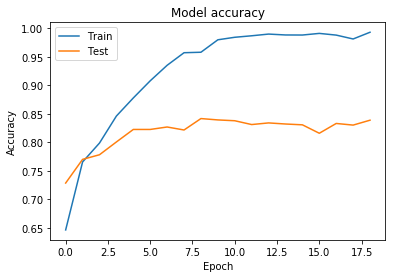

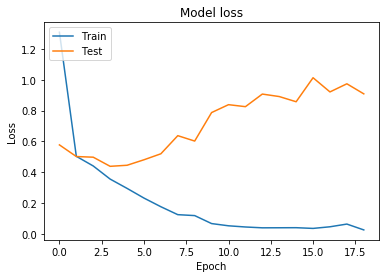

In [22]:
# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
label=[]
for element in test_ds.as_numpy_iterator():
    for x in element[1]:
        label.append(np.around(x).astype(int))



In [25]:
test_ds.class_names



['0_layout', '1_Genuine']

In [38]:
#Predictions on test set

#y_pred = np.around(model.predict(x_test)).astype(int)
y_pred = np.load(r'E:\Babette\MasterThesis\Models\best_baseline_model\full_data\predictions.npy')


In [48]:
type(label)

tensorflow.python.data.ops.dataset_ops._NumpyIterator

In [56]:
report = skm.classification_report(label, y_pred )
print(report) 


              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1267
           1       0.85      0.84      0.84      1355

   micro avg       0.84      0.84      0.84      2622
   macro avg       0.84      0.84      0.84      2622
weighted avg       0.84      0.84      0.84      2622



In [57]:
#confusion Matrix
cm = skm.confusion_matrix(label, y_pred)
print(cm)


[[1064  203]
 [ 217 1138]]


In [59]:
y_test= label
print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=1))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=1))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=1))



print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=0))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=0))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=0))


F1 score: 
0.844213649851632
Precision: 
0.84862043251305
Recall:
0.8398523985239852
F1 score: 
0.8351648351648351
Precision: 
0.8306010928961749
Recall:
0.8397790055248618


In [40]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.73

In [ ]:
# load model trained before
#model.load_weights('E:\Babette\MasterThesis\Models\Binary_CNN_model_3.h5')